<h1 align="center" style="background-color:DodgerBlue;">Desafío -  Clasificación desde Machine Learning</h1>

* Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
* Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
* Desarrollo desafío:
  * El desafío se debe desarrollar de manera Individual.
  * Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío - Clasificación desde Machine Learning.

#### Descripción

En esta sesión trabajaremos con una base de datos sobre clientes morosos de un banco.

Dentro de ésta se registran las siguientes observaciones:

* default: Variable binaria. Registra si el cliente entró en morosidad o no.
* income: Ingreso promedio declarado por el cliente.
* balance: Total de saldo en la cuenta de crédito.
* student: Variable binaria. Registra si el cliente es estudiante o no.

#### Desafío 1: Preparación del ambiente de trabajo
* Importe los módulos básicos para el análisis de datos
* Importe seaborn.
* Importe statsmodels.
* Importe LogisticRegression, train_test_split, StandardScaler, classification_report y roc_curve de sklearn.



In [1]:
# importaciones analicis exploratorio y muestreo de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# seaborn
import seaborn as sns
# scipy stats para simular
import scipy.stats as stats
# statsmodels para modelación
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
import lec6_graphs as gfx
plt.style.use('seaborn') # Gráficos estilo seaborn
# plt.rcParams["figure.figsize"] = (6, 3) # Tamaño gráficos
# plt.rcParams["figure.dpi"] = 200 # resolución gráficos
# Regrecion Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Matriz de confusion y metricas de desempeño
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#### Desafío 2: Análisis exploratorio
* Explore las principales relaciones entre las variables. Utilizando los métodos boxplot y lmplot de seaborn implemente los siguientes gráficos.
  * Un boxplot del balance total de las cuentas, segmentado por el status de estudiante.
  * Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante. 
  * Un boxplot del balance total de las cuentas, segmentado por el status de default.
  * Un boxplot del ingreso total de cada cliente, segmentado por el status de default.
  * Un diagrama de dispersión entre balance e income, segmentado por el status de estudiante.
  * Un diagrama de dispersión entre balance e income, segmentado por el status de default.
<p>

* Comente brevemente sobre los principales patrones de comportamiento.

tip: Puede utilizar el argumento hue en lmplot para identificar las observaciones por status.


In [3]:
# ingresamos la base de datos
df = pd.read_csv('datasets/default_credit.csv')
df

,index,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365


<AxesSubplot:xlabel='balance', ylabel='student'>

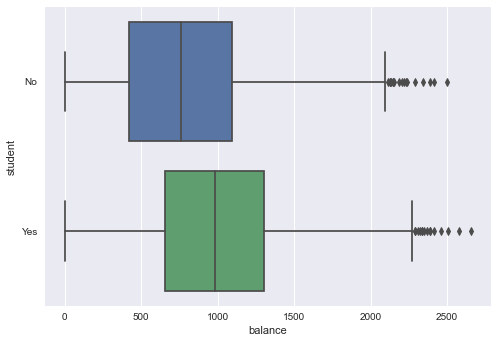

In [4]:
sns.boxplot(data = df, x = 'balance', y = 'student')

<AxesSubplot:xlabel='index', ylabel='student'>

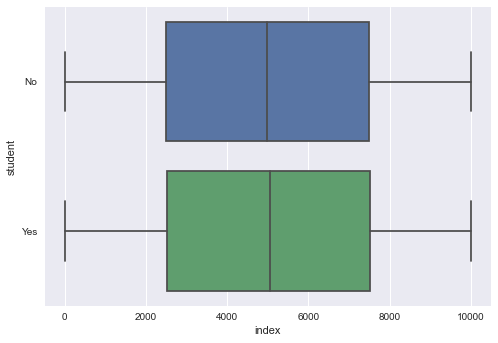

In [8]:
sns.boxplot(data = df, x = 'index', y = 'student')

In [ ]:
sns.boxplot(data = df, x = 'income', y = 'default')